## Importando os módulos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Carregandos os dados

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ViewingActivity.csv')

In [4]:
df.shape

(3292, 10)

## Visualização dos dados

In [5]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Stephania,2021-10-09 23:20:18,00:52:33,Autoplayed: user action: None;,Desaparecido para Sempre: Minissérie: Fred (Ep...,NaN,LG LG 2017 MStar M2R Standard DTV Smart TV,00:52:38,00:52:38,BR (Brazil)
1,Stephania,2021-10-09 22:29:59,00:50:16,NaN,Desaparecido para Sempre: Minissérie: Nora (Ep...,NaN,LG LG 2017 MStar M2R Standard DTV Smart TV,00:50:21,00:50:21,BR (Brazil)
2,Stephania,2021-10-09 21:45:51,00:44:06,NaN,Desaparecido para Sempre: Minissérie: Daco (Ep...,NaN,LG LG 2017 MStar M2R Standard DTV Smart TV,00:44:11,00:44:11,BR (Brazil)
3,Stephania,2021-10-09 20:33:18,00:46:55,Autoplayed: user action: User_Interaction;,Desaparecido para Sempre: Minissérie: Inès (Ep...,NaN,LG LG 2017 MStar M2R Standard DTV Smart TV,00:47:00,00:47:00,BR (Brazil)
4,Stephania,2021-10-09 19:45:12,00:41:20,Autoplayed: user action: User_Interaction;,Desaparecido para Sempre: Minissérie: Guillaum...,NaN,LG LG 2017 MStar M2R Standard DTV Smart TV,00:41:20,00:41:20,BR (Brazil)


## Transformação dos dados

In [6]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head()

,Start Time,Duration,Title
0,2021-10-09 23:20:18,00:52:33,Desaparecido para Sempre: Minissérie: Fred (Ep...
1,2021-10-09 22:29:59,00:50:16,Desaparecido para Sempre: Minissérie: Nora (Ep...
2,2021-10-09 21:45:51,00:44:06,Desaparecido para Sempre: Minissérie: Daco (Ep...
3,2021-10-09 20:33:18,00:46:55,Desaparecido para Sempre: Minissérie: Inès (Ep...
4,2021-10-09 19:45:12,00:41:20,Desaparecido para Sempre: Minissérie: Guillaum...


In [7]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

In [8]:
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [9]:
df = df.set_index('Start Time')

In [10]:
#convertendo para o fuso horarios local
df.index = df.index.tz_convert('America/Sao_Paulo')

In [11]:
df = df.reset_index()

In [12]:
df.head()

,Start Time,Duration,Title
0,2021-10-09 20:20:18-03:00,00:52:33,Desaparecido para Sempre: Minissérie: Fred (Ep...
1,2021-10-09 19:29:59-03:00,00:50:16,Desaparecido para Sempre: Minissérie: Nora (Ep...
2,2021-10-09 18:45:51-03:00,00:44:06,Desaparecido para Sempre: Minissérie: Daco (Ep...
3,2021-10-09 17:33:18-03:00,00:46:55,Desaparecido para Sempre: Minissérie: Inès (Ep...
4,2021-10-09 16:45:12-03:00,00:41:20,Desaparecido para Sempre: Minissérie: Guillaum...


In [13]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [15]:
#criando colunas especificas para episodio e temporada a partir da coluna 'Title'
df[['Title_Name', 'Season', 'Episode']] = df['Title'].str.split(':', n=2,expand=True)
df.drop('Title', axis=1, inplace=True)
df.head()

,Start Time,Duration,Title_Name,Season,Episode
0,2021-10-09 20:20:18-03:00,0 days 00:52:33,Desaparecido para Sempre,Minissérie,Fred (Episódio 5)
1,2021-10-09 19:29:59-03:00,0 days 00:50:16,Desaparecido para Sempre,Minissérie,Nora (Episódio 4)
2,2021-10-09 18:45:51-03:00,0 days 00:44:06,Desaparecido para Sempre,Minissérie,Daco (Episódio 3)
3,2021-10-09 17:33:18-03:00,0 days 00:46:55,Desaparecido para Sempre,Minissérie,Inès (Episódio 2)
4,2021-10-09 16:45:12-03:00,0 days 00:41:20,Desaparecido para Sempre,Minissérie,Guillaume (Episódio 1)


In [16]:
df['weekday'] = df['Start Time'].dt.weekday
df['hour'] = df['Start Time'].dt.hour

df.head()

,Start Time,Duration,Title_Name,Season,Episode,weekday,hour
0,2021-10-09 20:20:18-03:00,0 days 00:52:33,Desaparecido para Sempre,Minissérie,Fred (Episódio 5),5,20
1,2021-10-09 19:29:59-03:00,0 days 00:50:16,Desaparecido para Sempre,Minissérie,Nora (Episódio 4),5,19
2,2021-10-09 18:45:51-03:00,0 days 00:44:06,Desaparecido para Sempre,Minissérie,Daco (Episódio 3),5,18
3,2021-10-09 17:33:18-03:00,0 days 00:46:55,Desaparecido para Sempre,Minissérie,Inès (Episódio 2),5,17
4,2021-10-09 16:45:12-03:00,0 days 00:41:20,Desaparecido para Sempre,Minissérie,Guillaume (Episódio 1),5,16


## Quantas vezes eu assisti cada série?

In [17]:
df['Title_Name'].value_counts()

Brooklyn Nine-Nine                239
Elementary                        162
Lucifer                           132
BoJack Horseman                    97
Greenleaf                          85
                                 ... 
Re                                  1
Diário de Horrores                  1
Cenas de um Homicídio               1
Rookie Historian Goo Hae-Ryung      1
Doze Jurados                        1
Name: Title_Name, Length: 380, dtype: int64

## Top 10 séries mais assistidas

In [18]:
df.groupby(['Title_Name']).agg({'Duration':'sum'}).sort_values(
    by='Duration',ascending=False).head(10)

,Duration
Title_Name,
Elementary,3 days 13:25:00
Brooklyn Nine-Nine,3 days 02:45:28
Lucifer,2 days 20:28:00
Breaking Bad,1 days 23:49:15
Mentes Criminosas,1 days 17:43:06
Greenleaf,1 days 16:39:14
Billions,1 days 15:52:40
13 Reasons Why,1 days 13:00:20
Stranger,1 days 10:46:46


## Análise mais detalhada do quanto eu assisti Brooklyn Nine-nine

In [21]:
#criação de um novo df chamado 'brooklyn' a partir do df original
#apenas as linhas em que o título contém 'Brooklyn Nine-Nine'
brooklyn = df[df['Title_Name'] == 'Brooklyn Nine-Nine']

### Quanto tempo eu gastei assistindo 'Brooklyn Nine-Nine'?

In [22]:
brooklyn['Duration'].sum()

Timedelta('3 days 02:45:28')

### Quantas vezes eu assisti episódios de cada temporada de 99?

In [23]:
brooklyn['Season'].value_counts()

 Temporada 1                   59
 Temporada 4                   51
 Temporada 2                   51
 Temporada 3                   49
 Temporada 6                   19
 Temporada 5                    6
 Season 1_hook_primary_16x9     2
 Temporada 7                    2
Name: Season, dtype: int64

### Qual dia da semana eu mais assisti 99?

In [29]:
brooklyn['weekday'] = pd.Categorical(brooklyn['weekday'], categories=[0,1,2,3,4,5,6], ordered=True)
brooklyn_by_day = brooklyn['weekday'].value_counts()
#ordenar pelo dia da semana sendo segunda(0), terça(1)...
brooklyn_by_day = brooklyn_by_day.sort_index() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


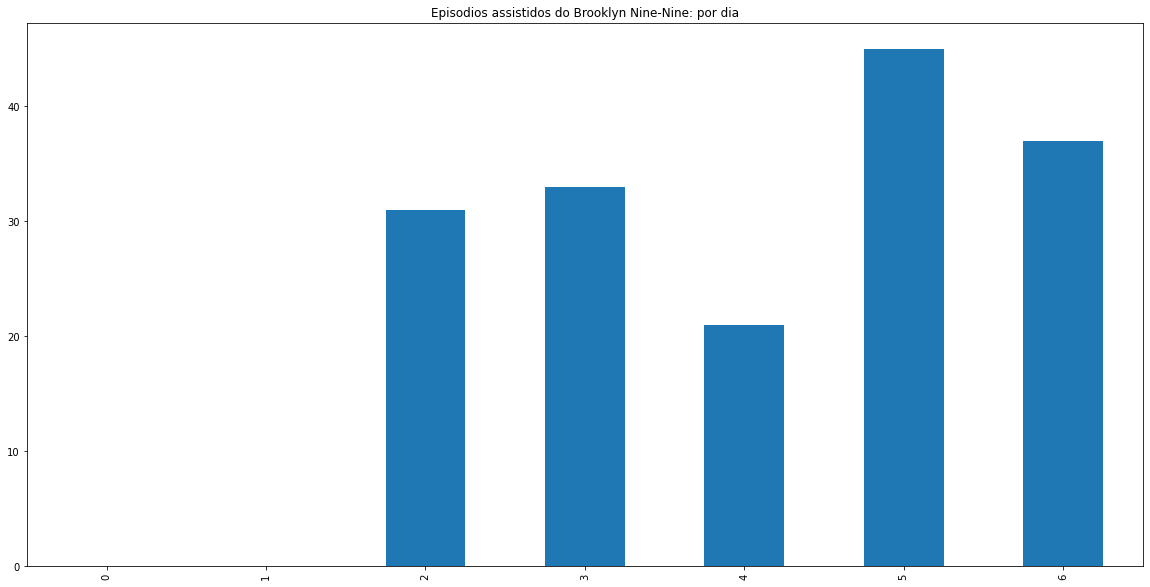

In [30]:
#plotar o 'brooklyn_by_day' como um gráfico de barras
brooklyn_by_day.plot(kind='bar', figsize=(20,10), title='Episodios assistidos do Brooklyn Nine-Nine: por dia');

### Qual horario do dia eu mais assisti 99?

In [31]:
brooklyn['hour'] = pd.Categorical(brooklyn['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                                  ordered=True)
brooklyn_by_hour = brooklyn['hour'].value_counts()
#ordenar por hora sendo 1, 2...
brooklyn_by_hour = brooklyn_by_hour.sort_index() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


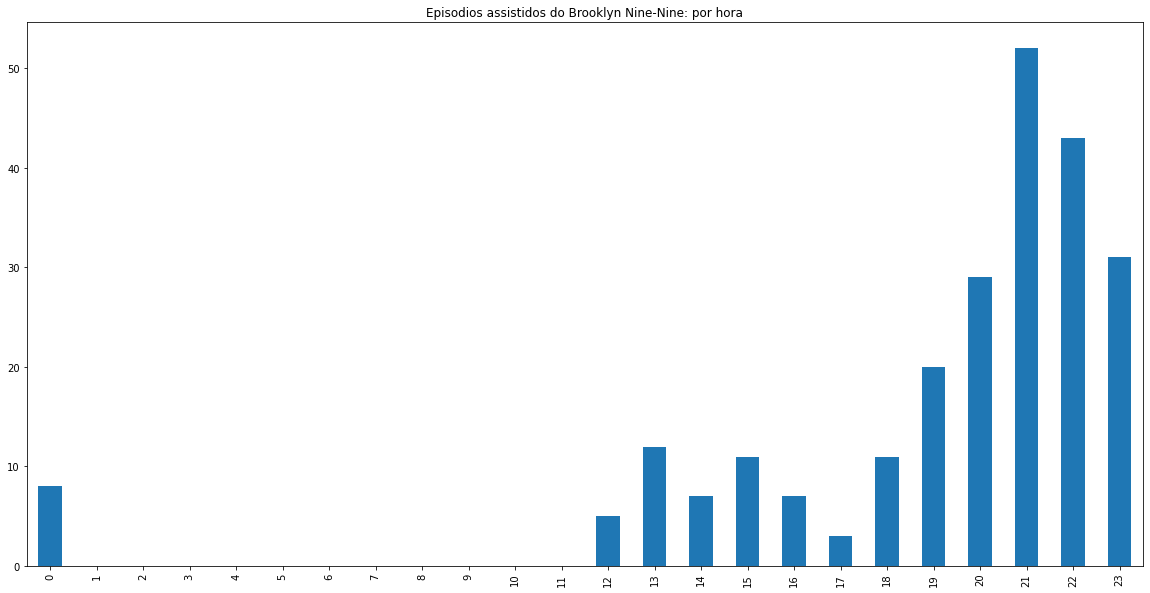

In [32]:
#plotar o 'brooklyn_by_hour' como um gráfico de barras
brooklyn_by_hour.plot(kind='bar', figsize=(20,10), title='Episodios assistidos do Brooklyn Nine-Nine: por hora');